<a href="https://colab.research.google.com/github/T0mSIlver/OCT_GANs/blob/main/Examples_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import zipfile
from google.colab import drive
import matplotlib.pyplot as plt

import torch

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [ ]:
datas

# Download dataset from drive + prep folder

In [ ]:
! rm -r "/content/OCT2017 /"

In [6]:
drive.mount('/content/drive')
drive_path = "/content/drive/My Drive/Colab/progan/"

Mounted at /content/drive


In [7]:
zip_ref = zipfile.ZipFile(drive_path+'kermany2018.zip', 'r')
#destination_path = '/content/OCTimages/NORMAL'
for file in zip_ref.infolist():
    if file.filename.startswith('OCT2017 /train/DRUSEN'): #ONLY DOWNLOADING DRUSEN train IMAGES
        #print(file.filename.split('/')[-1])
        zip_ref.extract(file)
zip_ref.close()

# Create dataset

In [8]:
image_size = 256
CHANNELS_IMG = 3

In [31]:
transform = transforms.Compose(
        [
            transforms.Resize((image_size, image_size)),
            transforms.CenterCrop((image_size, image_size)),
            transforms.ToTensor(),
            transforms.RandomHorizontalFlip(p=0.5)
        ]
    )
dataroot = "/content/OCT2017 /train/"
batch_size = 50
dataset = datasets.ImageFolder(root=dataroot, transform=transform)

In [ ]:
torch.reshape(dataset[1][0].squeeze(), (256,256,3))

In [32]:
dataset[1][0].permute(1, 2, 0).shape

torch.Size([256, 256, 3])

(-0.5, 255.5, 255.5, -0.5)

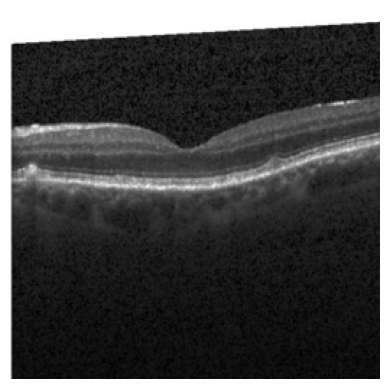

In [35]:
plt.imshow(dataset[2][0].permute(1, 2, 0))
plt.axis('off')


# Generate a page of examples

In [ ]:
fig, axs = plt.subplots(nrows = 9, ncols = 3, figsize = (13,29.7), dpi = 300)
for i in range(30):
  plt.imshow(dataset[2][0].permute(1, 2, 0))
  plt.axis('off')


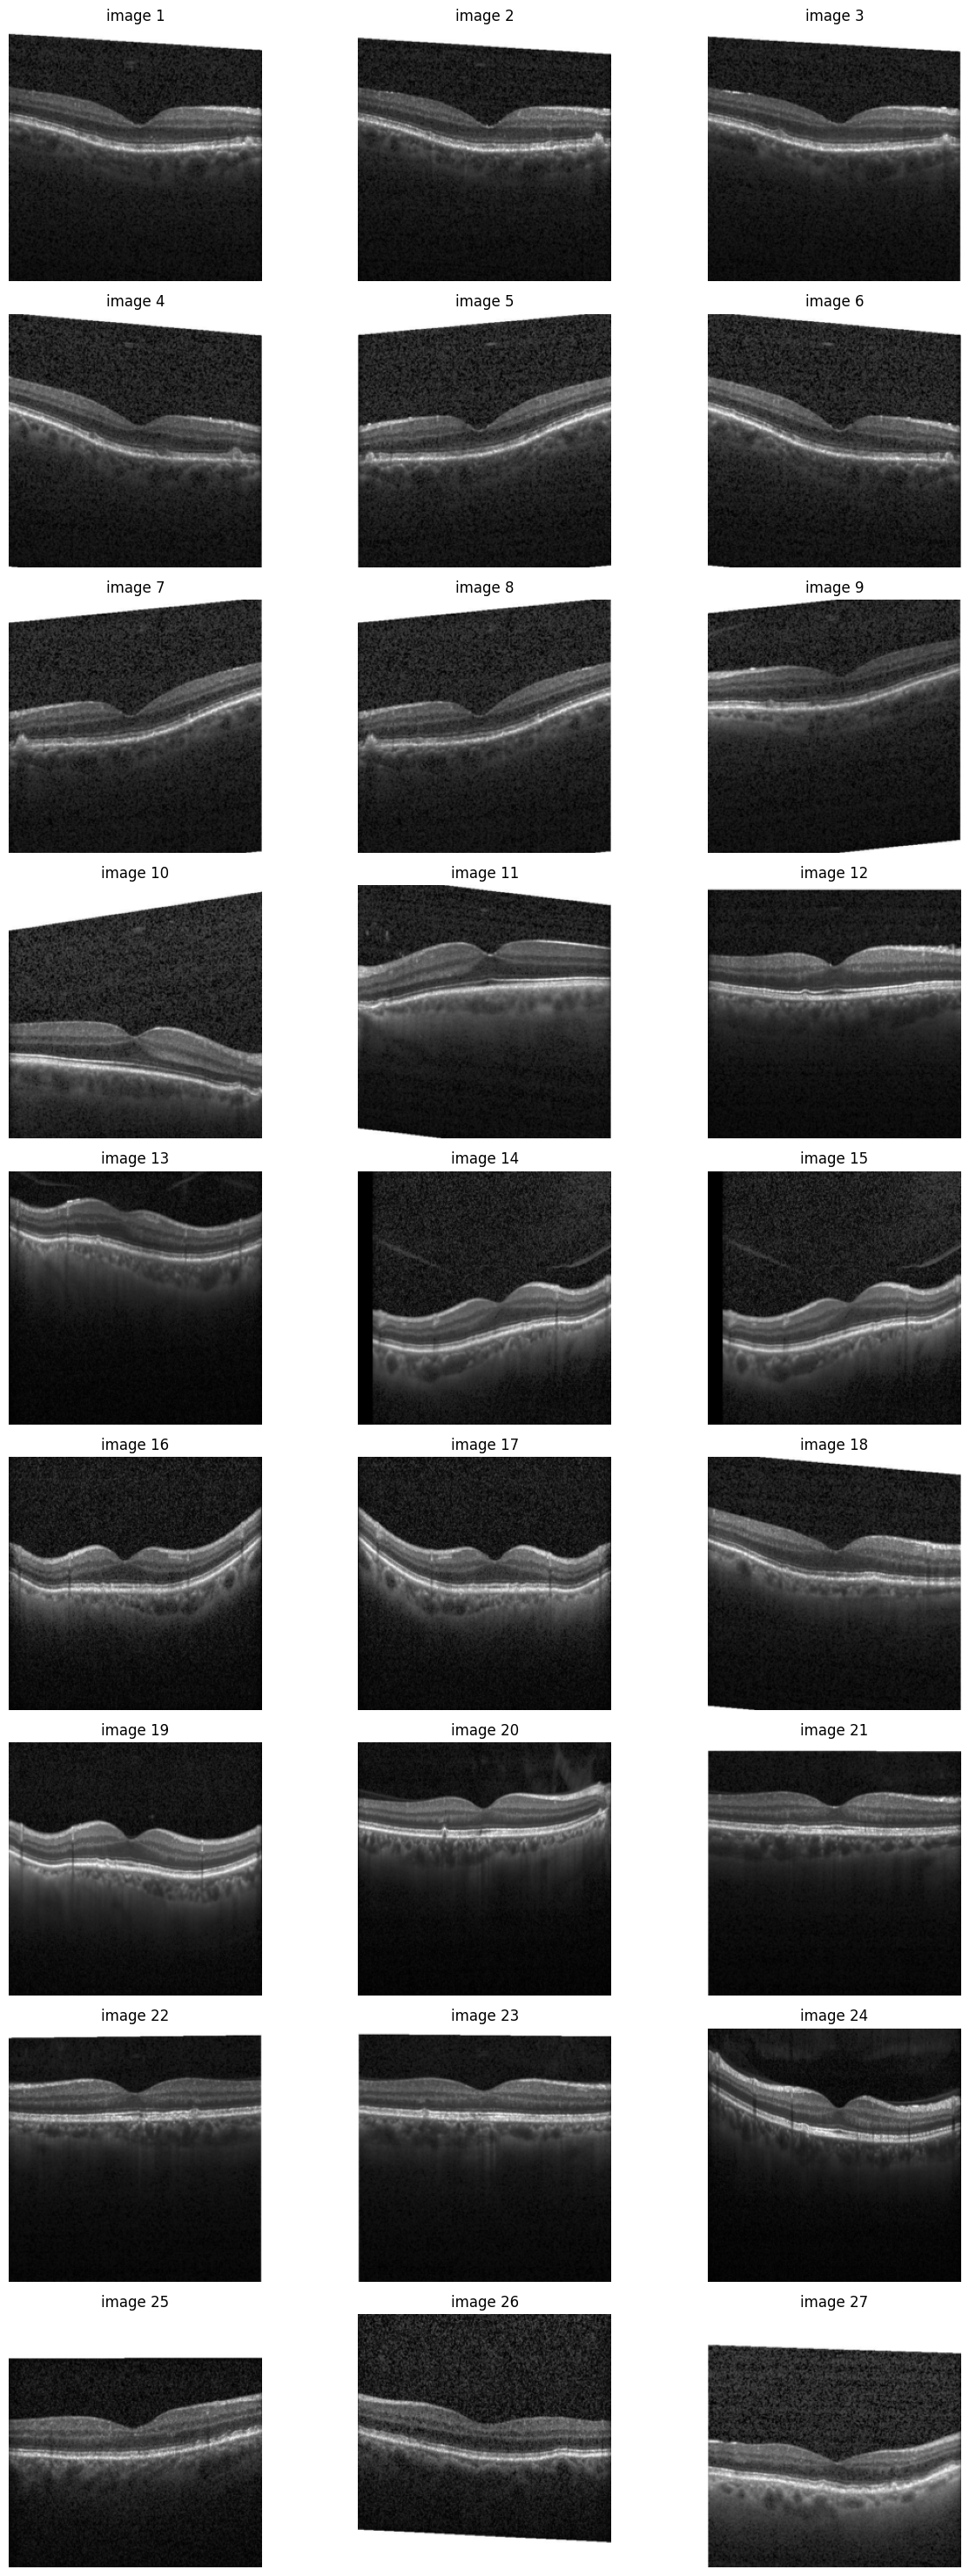

In [37]:
plt.figure(figsize=(13,29.7))
for i in range(27):
    ax = plt.subplot(9, 3, i + 1)
    plt.imshow(dataset[i][0].permute(1, 2, 0))
    plt.title(f'image {i+1}')
    plt.axis("off")
plt.tight_layout()
plt.savefig("oct_drusen_sample.png", dpi=300)